In [4]:
from alphaengine import stats, loaders
import matplotlib.pyplot as plt

In [3]:
luv = loaders.FileInstrument('../../../Developer/Data/prices/NYSE/LUV.csv')

In [5]:
import talib as ta

In [9]:
ta.RSI(luv['close'], timeperiod=100)

array([        nan,         nan,         nan, ..., 50.25572759,
       50.34067179, 50.26480922])

In [10]:
ta.RSI(luv['close'], timeperiod=10)

array([        nan,         nan,         nan, ..., 44.54698904,
       45.97306576, 44.85166242])

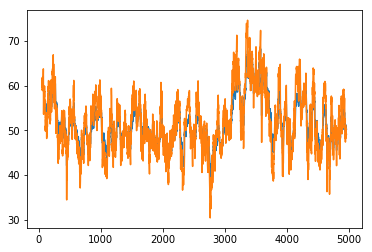

In [14]:
plt.plot(ta.RSI(luv['close'], timeperiod=100))
plt.plot(ta.RSI(luv['close'], timeperiod=50))

In [20]:
luv.attach_feature(ta.RSI(luv['close'], timeperiod=100), 'rsi_100')
luv.attach_feature(ta.RSI(luv['close'], timeperiod=50), 'rsi_50')

In [36]:
mc = stats.monte_carlo(luv, luv['rsi_100'] > luv['rsi_50'])

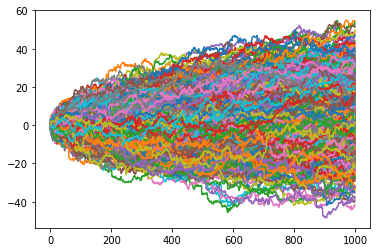

In [25]:
plt.plot(mc.T)

In [26]:
luv.column_names

['day',
 'month',
 'year',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'forward_returns',
 'rsi_100',
 'rsi_50',
 'rsi_100',
 'rsi_50']

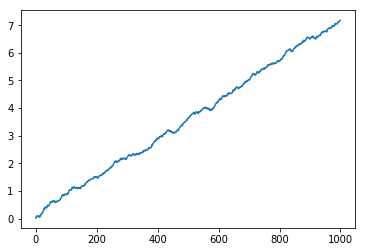

In [27]:
import numpy as np
plt.plot(np.mean(mc, axis=0))

(array([ 1.,  3.,  1.,  2.,  7.,  2.,  2., 11.,  3., 11., 13., 14., 19.,
        18., 22., 24., 29., 29., 34., 36., 41., 40., 39., 28., 53., 45.,
        40., 40., 39., 33., 42., 34., 29., 39., 22., 27., 33., 21., 18.,
        15., 10.,  9.,  5.,  6.,  1.,  2.,  2.,  2.,  2.,  2.]),
 array([-41.55  , -39.6294, -37.7088, -35.7882, -33.8676, -31.947 ,
        -30.0264, -28.1058, -26.1852, -24.2646, -22.344 , -20.4234,
        -18.5028, -16.5822, -14.6616, -12.741 , -10.8204,  -8.8998,
         -6.9792,  -5.0586,  -3.138 ,  -1.2174,   0.7032,   2.6238,
          4.5444,   6.465 ,   8.3856,  10.3062,  12.2268,  14.1474,
         16.068 ,  17.9886,  19.9092,  21.8298,  23.7504,  25.671 ,
         27.5916,  29.5122,  31.4328,  33.3534,  35.274 ,  37.1946,
         39.1152,  41.0358,  42.9564,  44.877 ,  46.7976,  48.7182,
         50.6388,  52.5594,  54.48  ]),
 <a list of 50 Patch objects>)

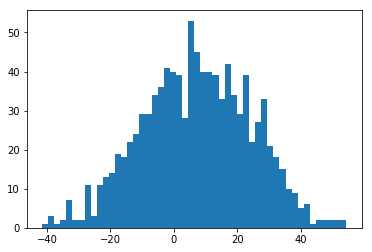

In [31]:
plt.hist(mc[:,-1], bins=50)

In [37]:
bh = stats.monte_carlo(luv, np.ones(len(luv['close'])).astype(bool))

(array([ 1.,  2.,  0.,  2.,  0.,  2.,  3.,  2.,  7.,  7.,  7., 13.,  7.,
        21., 21., 23., 34., 38., 36., 36., 48., 39., 55., 49., 38., 45.,
        56., 47., 42., 41., 45., 35., 30., 34., 27., 11., 27., 15.,  5.,
        14., 12.,  5.,  7.,  4.,  2.,  4.,  0.,  0.,  0.,  1.]),
 array([-48.33  , -46.1068, -43.8836, -41.6604, -39.4372, -37.214 ,
        -34.9908, -32.7676, -30.5444, -28.3212, -26.098 , -23.8748,
        -21.6516, -19.4284, -17.2052, -14.982 , -12.7588, -10.5356,
         -8.3124,  -6.0892,  -3.866 ,  -1.6428,   0.5804,   2.8036,
          5.0268,   7.25  ,   9.4732,  11.6964,  13.9196,  16.1428,
         18.366 ,  20.5892,  22.8124,  25.0356,  27.2588,  29.482 ,
         31.7052,  33.9284,  36.1516,  38.3748,  40.598 ,  42.8212,
         45.0444,  47.2676,  49.4908,  51.714 ,  53.9372,  56.1604,
         58.3836,  60.6068,  62.83  ]),
 <a list of 50 Patch objects>)

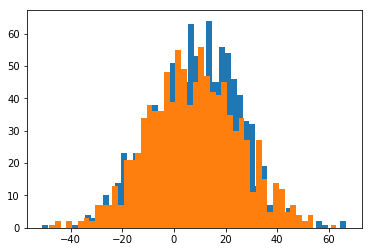

In [46]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

In [39]:
from statsmodels.stats.weightstats import ttest_ind

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')

(-1.595169238599244, 0.9445837253409723, 1998.0)

In [66]:
def calculate_p_score(asset, strategy, samples=1000, simulations=1000):
    bh_strat = np.ones(len(asset['close'])).astype(bool)
    
    mc = stats.monte_carlo(asset, strategy, samples=samples, simulations=simulations)
    bh = stats.monte_carlo(asset, bh_strat, samples=samples, simulations=simulations)
    
    _, p, _ = ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')
    return p

In [67]:
calculate_p_score(luv, luv['rsi_100'] > luv['rsi_50'])

0.990530259432444

In [70]:
good_strats = []

for i in range(100):
    print(i)
    rsi = ta.RSI(luv['close'], timeperiod=5+i)
    p = calculate_p_score(luv, rsi > 60)
    if p < 0.001:
        good_strats.append(rsi > 60)

0
1
2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [71]:
good_strats

[array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..

(array([ 2.,  1.,  2.,  4.,  2.,  4.,  4., 12.,  6.,  5.,  6., 11., 12.,
        18., 18., 29., 30., 29., 39., 32., 45., 28., 46., 45., 38., 47.,
        48., 43., 48., 50., 43., 42., 39., 26., 28., 19., 22., 17.,  9.,
        14., 11.,  6.,  7.,  4.,  1.,  1.,  1.,  3.,  1.,  2.]),
 array([-9.96  , -8.1588, -6.3576, -4.5564, -2.7552, -0.954 ,  0.8472,
         2.6484,  4.4496,  6.2508,  8.052 ,  9.8532, 11.6544, 13.4556,
        15.2568, 17.058 , 18.8592, 20.6604, 22.4616, 24.2628, 26.064 ,
        27.8652, 29.6664, 31.4676, 33.2688, 35.07  , 36.8712, 38.6724,
        40.4736, 42.2748, 44.076 , 45.8772, 47.6784, 49.4796, 51.2808,
        53.082 , 54.8832, 56.6844, 58.4856, 60.2868, 62.088 , 63.8892,
        65.6904, 67.4916, 69.2928, 71.094 , 72.8952, 74.6964, 76.4976,
        78.2988, 80.1   ]),
 <a list of 50 Patch objects>)

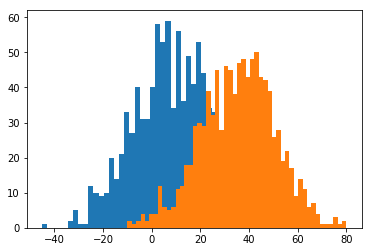

In [64]:
plt.hist(bh, bins=50)
plt.hist(mc, bins=50)

In [72]:
eurusd = loaders.FileInstrument('../../../Developer/Data/prices/FOREX/EURUSD.csv')

In [73]:
good_strats = []

for i in range(100):
    print(i)
    rsi = ta.RSI(eurusd['close'], timeperiod=5+i)
    p = calculate_p_score(eurusd, rsi > 60)
    if p < 0.001:
        good_strats.append(rsi > 60)

0
1
2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


3
4
5
6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [74]:
good_strats

[array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ..

In [141]:
bh = stats.monte_carlo(eurusd, np.ones(len(eurusd['close'])).astype(bool))
mc = stats.monte_carlo(eurusd, good_strats[31])

(array([ 1.,  0.,  0.,  1.,  0.,  6.,  2.,  4.,  2.,  5.,  7.,  6.,  9.,
         9., 17., 22., 25., 26., 32., 37., 36., 47., 50., 43., 46., 50.,
        60., 43., 46., 54., 40., 30., 51., 38., 39., 20., 16., 21., 13.,
        11.,  8.,  5.,  4.,  8.,  1.,  4.,  0.,  3.,  1.,  1.]),
 array([-4.32200e-01, -4.05174e-01, -3.78148e-01, -3.51122e-01,
        -3.24096e-01, -2.97070e-01, -2.70044e-01, -2.43018e-01,
        -2.15992e-01, -1.88966e-01, -1.61940e-01, -1.34914e-01,
        -1.07888e-01, -8.08620e-02, -5.38360e-02, -2.68100e-02,
         2.16000e-04,  2.72420e-02,  5.42680e-02,  8.12940e-02,
         1.08320e-01,  1.35346e-01,  1.62372e-01,  1.89398e-01,
         2.16424e-01,  2.43450e-01,  2.70476e-01,  2.97502e-01,
         3.24528e-01,  3.51554e-01,  3.78580e-01,  4.05606e-01,
         4.32632e-01,  4.59658e-01,  4.86684e-01,  5.13710e-01,
         5.40736e-01,  5.67762e-01,  5.94788e-01,  6.21814e-01,
         6.48840e-01,  6.75866e-01,  7.02892e-01,  7.29918e-01,
         7.5

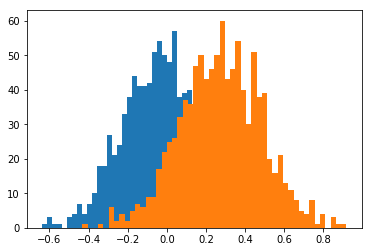

In [142]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

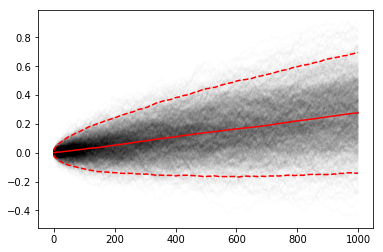

In [154]:
upper, lower = stats.confidence_bands(mc)

plt.plot(mc.T, color='k', alpha=0.01)
plt.plot(np.mean(mc, axis=0), color='r')
plt.plot(upper, color='r', linestyle='dashed')
plt.plot(lower, color='r', linestyle='dashed')

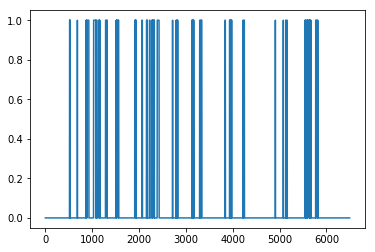

In [159]:
plt.plot(good_strats[31])